# **Import Library**

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.api.types
import math
import lightgbm as lgb

from scipy.stats import zscore
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, davies_bouldin_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, XGBRegressor
from lifelines.utils import concordance_index
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# JCOPML Package
from jcopml.plot import plot_missing_value
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import random_search_params as rsp
from jcopml.feature_importance import mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease
from jcopml.tuning import bayes_search_params as bsp
from jcopml.tuning import grid_search_params as gsp

# **Import Dataset**

In [48]:
data = pd.read_csv("data/Age Prediction.csv")
data

,ID,Age_group,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
0,73564,Adult,61,2,2,35.7,110,2,150,14.91
1,73568,Adult,26,2,2,20.3,89,2,80,3.85
2,73576,Adult,16,1,2,23.2,89,2,68,6.14
3,73577,Adult,32,1,2,28.9,104,2,84,16.15
4,73580,Adult,38,2,1,35.9,103,2,81,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711,Adult,38,2,2,33.5,100,2,73,6.53
2274,83712,Adult,61,1,2,30.0,93,2,208,13.02
2275,83713,Adult,34,1,2,23.7,103,2,124,21.41
2276,83718,Adult,60,2,2,27.4,90,2,108,4.99


In [5]:
print("\n Dataset Info : ")
print(data.info())


 Dataset Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2278 non-null   int64  
 1   Age_group                    2278 non-null   object 
 2   Age                          2278 non-null   int64  
 3   Gender                       2278 non-null   int64  
 4   PAQ605                       2278 non-null   int64  
 5   Body Mass Index              2278 non-null   float64
 6   Blood Glucose after fasting  2278 non-null   int64  
 7   Diabetic or not              2278 non-null   int64  
 8   Respondent's Oral            2278 non-null   int64  
 9   Blood Insulin Levels         2278 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 178.1+ KB
None


# **Exploratory Data Analysis (EDA)**

In [49]:
num_col = data.select_dtypes(include=[np.number])
cat_col = data.select_dtypes(include=[object])

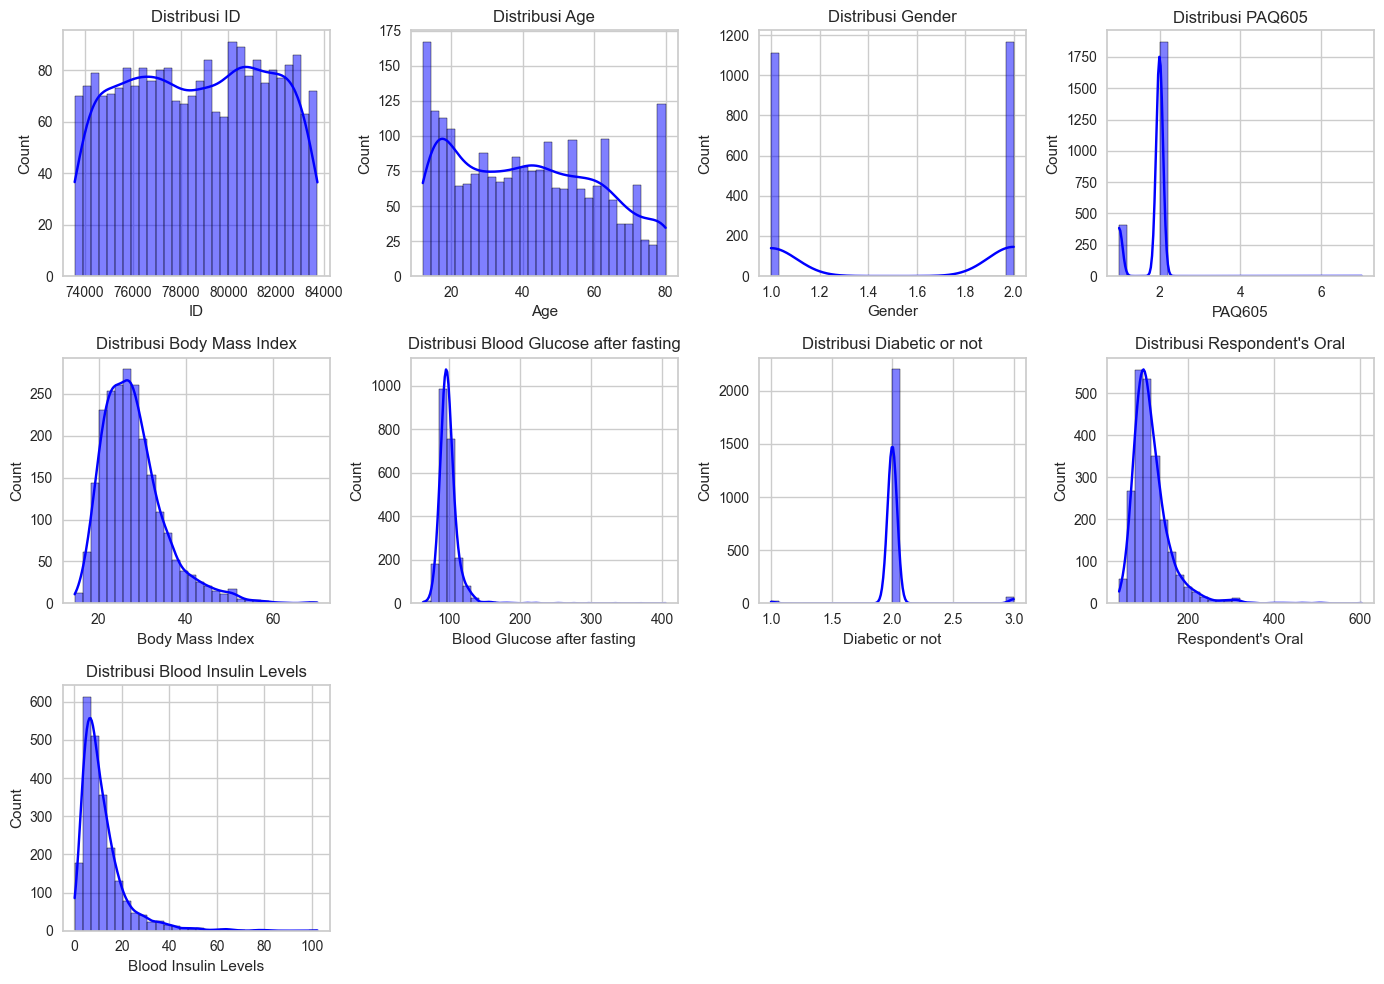

In [50]:
# EDA untuk Distribusi data numerik
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_col.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Plotting: 100%|██████████| 1/1 [00:00<00:00, 30.31it/s]


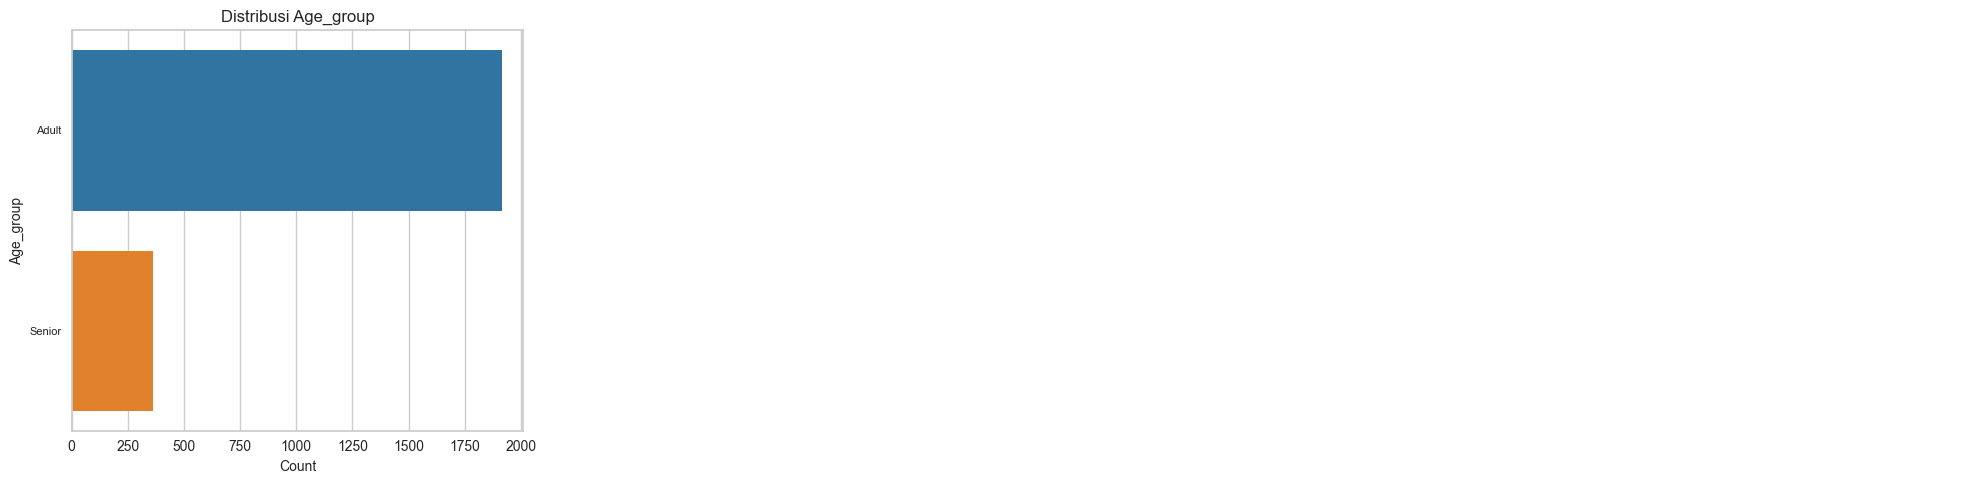

In [51]:
# EDA untuk Distribusi data kategorik
cat_features = data.select_dtypes(include=[object])
size_cat = len(cat_col.columns)

rows = math.ceil(size_cat / 4) 
fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))
axes = axes.flatten()  

for i, column in tqdm(enumerate(cat_features.columns), total=size_cat, desc="Plotting"):
    top_categories = data[column].value_counts().nlargest(10).index
    filtered_data = data[data[column].isin(top_categories)]
    sns.countplot(y=filtered_data[column], hue=filtered_data[column], ax=axes[i], palette='tab10', legend=False)
    axes[i].set_title(f'Distribusi {column}', fontsize=12)
    axes[i].set_xlabel('Count', fontsize=10)
    axes[i].set_ylabel(column, fontsize=10)
    
    plt.setp(axes[i].get_yticklabels(), fontsize=8)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

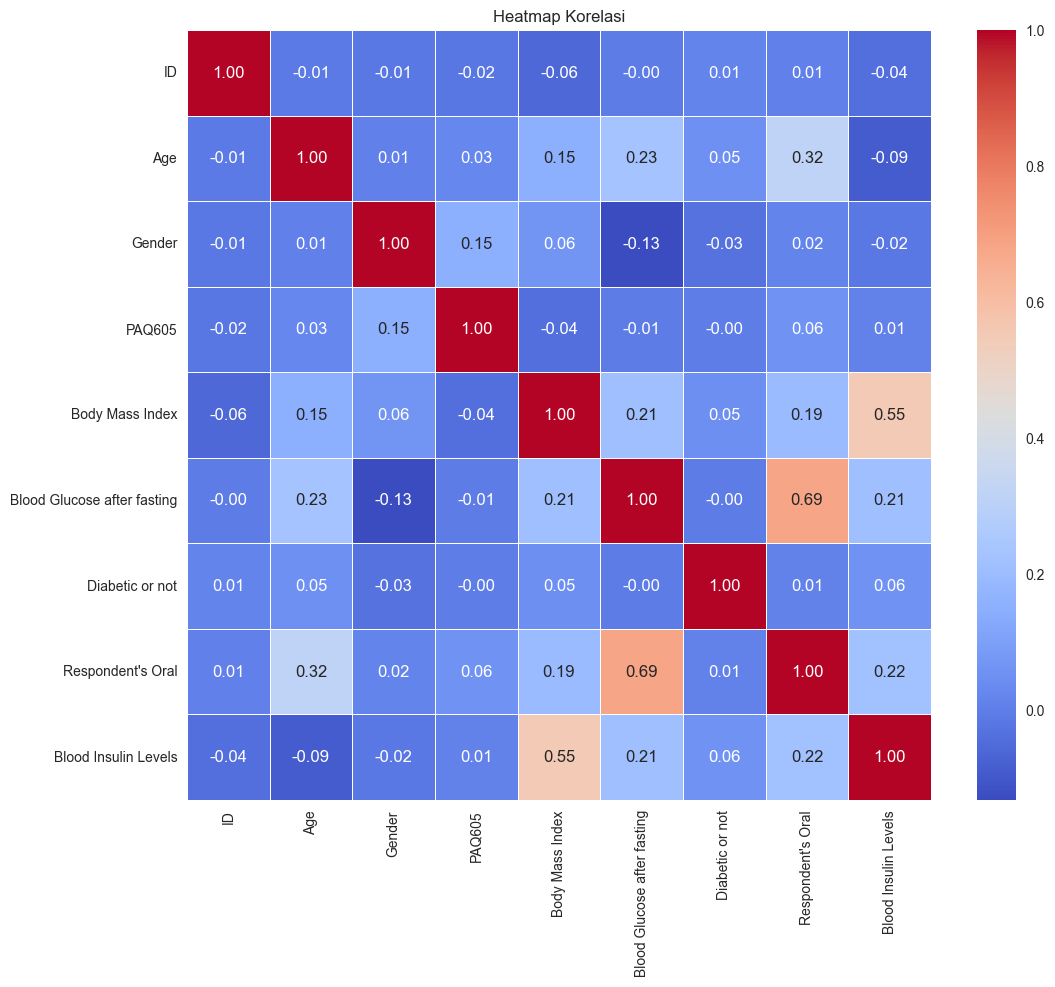

In [52]:
plt.figure(figsize=(12, 10))
correlation_matrix = num_col.corr()  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

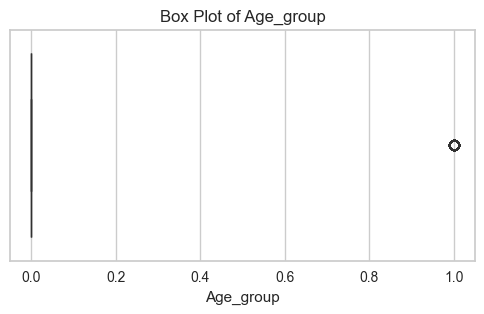

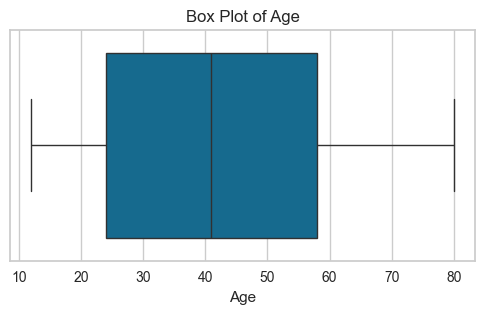

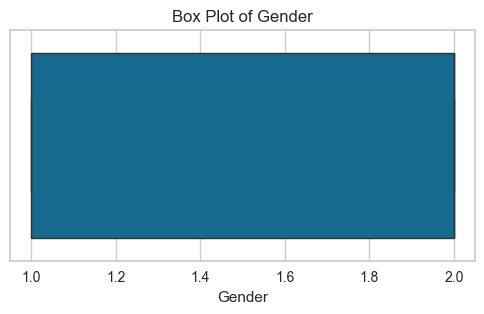

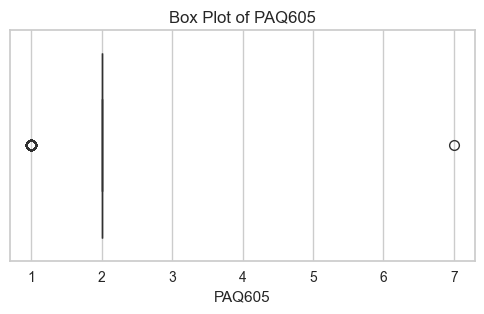

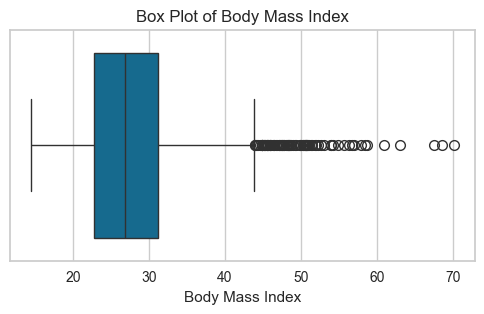

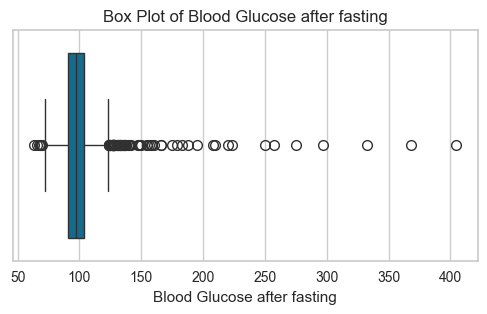

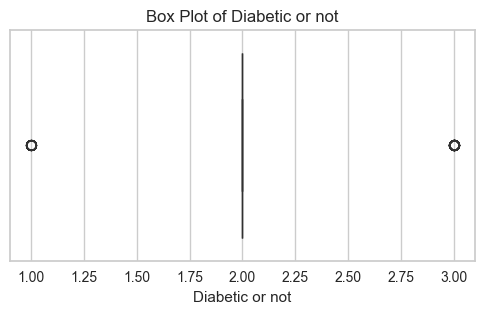

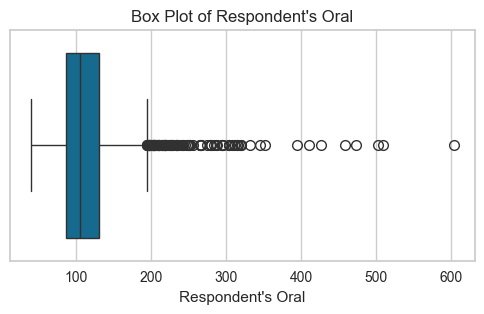

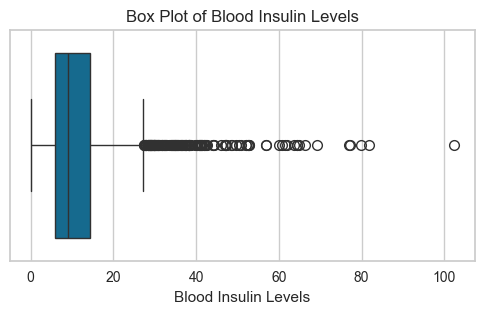

In [57]:
for feature in data.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x = data[feature])
    plt.title(f"Box Plot of {feature}")
    plt.show()

In [11]:
# Cek apakah ada data yang kosong
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
ID                             0
Age_group                      0
Age                            0
Gender                         0
PAQ605                         0
Body Mass Index                0
Blood Glucose after fasting    0
Diabetic or not                0
Respondent's Oral              0
Blood Insulin Levels           0
dtype: int64


In [54]:
data.drop(columns=['ID'], inplace=True)

In [56]:
encoder = LabelEncoder()
data['Age_group'] = encoder.fit_transform(data['Age_group'])
data.head(3)

,Age_group,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
0,0,61,2,2,35.7,110,2,150,14.91
1,0,26,2,2,20.3,89,2,80,3.85
2,0,16,1,2,23.2,89,2,68,6.14


In [12]:
data.head(3)

,ID,Age_group,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
0,73564,Adult,61,2,2,35.7,110,2,150,14.91
1,73568,Adult,26,2,2,20.3,89,2,80,3.85
2,73576,Adult,16,1,2,23.2,89,2,68,6.14


In [58]:
data.select_dtypes(include=[np.number]).columns

Index(['Age_group', 'Age', 'Gender', 'PAQ605', 'Body Mass Index',
       'Blood Glucose after fasting', 'Diabetic or not', 'Respondent's Oral',
       'Blood Insulin Levels'],
      dtype='object')

In [59]:
numerical_column = ['Age_group', 'PAQ605', 'Body Mass Index', 'Blood Glucose after fasting', 'Diabetic or not', 'Respondent\'s Oral', 'Blood Insulin Levels']

In [60]:
# Scaling with Robust Scaler
scaler = RobustScaler()

for column in numerical_column:
    data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))

# **Model Building**

In [61]:
data.head(3)

,Age_group,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
0,0.0,61,2,0.0,1.059524,1.000000,0.0,1.046512,0.684149
1,0.0,26,2,0.0,-0.773810,-0.615385,0.0,-0.581395,-0.604895
2,0.0,16,1,0.0,-0.428571,-0.615385,0.0,-0.860465,-0.337995


In [62]:
X = data.drop(columns=['Age'], axis=1)
y = data['Age']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1822, 8), (456, 8), (1822,), (456,))

In [97]:
rf = RandomForestRegressor(n_estimators=100,max_depth=10, max_features=5, max_leaf_nodes=5, max_samples=3)
xgb = XGBRegressor(n_estimators=100, max_depth=10)
lr = LogisticRegression(max_iter=100, solver='newton-cg')

In [101]:
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [102]:
y_pred_xgb = xgb.predict(X_val)

mae_xgb    = mean_absolute_error(y_val,y_pred_xgb)
mse_xgb    = mean_squared_error(y_val,y_pred_xgb)
r2_xgb     = r2_score(y_val,y_pred_xgb)
rmse_xgb   = np.sqrt(mse_xgb)
 
print(f"MAE     : {mae_xgb}")
print(f"MSE     : {mse_xgb}")
print(f"R²      : {r2_xgb}")
print(f"RMSE    : {rmse_xgb}")

MAE     : 10.409720880943432
MSE     : 179.2233034648318
R²      : 0.5703765153884888
RMSE    : 13.387430801495551


In [103]:
y_pred_rf = rf.predict(X_val)

mae_rf    = mean_absolute_error(y_val,y_pred_rf)
mse_rf    = mean_squared_error(y_val,y_pred_rf)
r2_rf     = r2_score(y_val,y_pred_rf)
rmse_rf   = np.sqrt(mse_rf)
 
print(f"MAE     : {mae_rf}")
print(f"MSE     : {mse_rf}")
print(f"R²      : {r2_rf}")
print(f"RMSE    : {rmse_rf}")

MAE     : 16.191447368421052
MSE     : 353.43296228070176
R²      : 0.15277146284791598
RMSE    : 18.799812825682647


In [104]:
y_pred_lr = lr.predict(X_val)

mae_lr    = mean_absolute_error(y_val,y_pred_lr)
mse_lr    = mean_squared_error(y_val,y_pred_lr)
r2_lr     = r2_score(y_val,y_pred_lr)
rmse_lr   = np.sqrt(mse_lr)
 
print(f"MAE     : {mae_lr}")
print(f"MSE     : {mse_lr}")
print(f"R²      : {r2_lr}")
print(f"RMSE    : {rmse_lr}")

MAE     : 11.37938596491228
MSE     : 258.1513157894737
R²      : 0.3811749752234592
RMSE    : 16.067087968560877


In [105]:
import warnings
warnings.filterwarnings('ignore')
print("Training Regression with LightGBM             : ")
train_data = lgb.Dataset(X_train, label=y_train)

test_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
print("done 100% ")

Training Regression with LightGBM             : 
done 100% 


In [106]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'early_stopping_rounds': 10
}

In [107]:
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 1822, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 41.909440
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[78]	valid_0's rmse: 11.9477


In [108]:
y_pred_lgbm = bst.predict(X_val)

mae_lgbm    = mean_absolute_error(y_val,y_pred_lgbm)
mse_lgbm    = mean_squared_error(y_val,y_pred_lgbm)
r2_lgbm     = r2_score(y_val,y_pred_lgbm)
rmse_lgbm   = np.sqrt(mse_lgbm)
 
print(f"MAE     : {mae_lgbm}")
print(f"MSE     : {mse_lgbm}")
print(f"R²      : {r2_lgbm}")
print(f"RMSE    : {rmse_lgbm}")

MAE     : 9.41292126909681
MSE     : 142.74822927219262
R²      : 0.6578124103453673
RMSE    : 11.947729042466296


# **Train with Hyperparameter Tunning**

### **With Randomized Search CV**

In [124]:
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor()

In [120]:
rsp_param_xgb = {
    'algo__max_depth': Integer(low=1, high=10),
    'algo__learning_rate': Real(low=1e-2, high=1e-1, prior='log-uniform'),
    'algo__n_estimators': Integer(low=100, high=200),
    'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
    'algo__gamma': Integer(low=1, high=10),
    'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
    'algo__reg_alpha': Real(low=1e-3, high=10, prior='log-uniform'),
    'algo__reg_lambda': Real(low=1e-3, high=10, prior='log-uniform') 
}

model_regresi_xgb_rsp = RandomizedSearchCV(estimator=xgb, param_distributions=rsp_param_xgb, n_iter=50, cv=5, n_jobs=-1, verbose=1)
model_regresi_xgb_rsp.fit(X_train, y_train)
print(f"Model best params : {model_regresi_xgb_rsp.best_params_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Model best params : {'algo__colsample_bytree': [0.449660593829864], 'algo__gamma': array([5]), 'algo__learning_rate': [0.04990733549904731], 'algo__max_depth': array([3]), 'algo__n_estimators': array([118]), 'algo__reg_alpha': [9.299697613020335], 'algo__reg_lambda': [0.003027985398984896], 'algo__subsample': [0.5113413909450395]}


In [126]:
rsp_param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [20, 50, 80],
    'max_features': [0.1, 0.5, 1],
    'min_samples_leaf': [1, 10, 20] 
}

model_regresi_rf_rsp = RandomizedSearchCV(estimator=rf, param_distributions=rsp_param_rf, n_iter=50, cv=5, n_jobs=-1, verbose=1)
model_regresi_rf_rsp.fit(X_train, y_train)
print(f"Model best params : {model_regresi_rf_rsp.best_params_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Model best params : {'n_estimators': 200, 'min_samples_leaf': 10, 'max_features': 0.5, 'max_depth': 50}


In [127]:
print("\nXGB Evaluation with Randomized SearchCV : ")
best_xgb_rsp = model_regresi_xgb_rsp.best_estimator_
y_pred_xgb_rsp = best_xgb_rsp.predict(X_val)

mae_xgb_rsp    = mean_absolute_error(y_val, y_pred_xgb_rsp)
mse_xgb_rsp    = mean_squared_error(y_val, y_pred_xgb_rsp)
r2_xgb_rsp     = r2_score(y_val, y_pred_xgb_rsp)
rmse_xgb_rsp   = np.sqrt(mse_xgb)
 
print(f"MAE     : {mae_xgb_rsp}")
print(f"MSE     : {mse_xgb_rsp}")
print(f"R²      : {r2_xgb_rsp}")
print(f"RMSE    : {rmse_xgb_rsp}")

print("\nRandom Forest Evaluation with Randomized SearchCV : ")
best_rf_rsp = model_regresi_rf_rsp.best_estimator_
y_pred_rf_rsp = best_rf_rsp.predict(X_val)

mae_rf_rsp    = mean_absolute_error(y_val, y_pred_rf_rsp)
mse_rf_rsp    = mean_squared_error(y_val, y_pred_rf_rsp)
r2_rf_rsp     = r2_score(y_val, y_pred_rf_rsp)
rmse_rf_rsp   = np.sqrt(mse_rf)
 
print(f"MAE     : {mae_rf_rsp}")
print(f"MSE     : {mse_rf_rsp}")
print(f"R²      : {r2_rf_rsp}")
print(f"RMSE    : {rmse_rf_rsp}")


XGB Evaluation with Randomized SearchCV : 
MAE     : 10.05355019109291
MSE     : 171.71082216468824
R²      : 0.5883849859237671
RMSE    : 13.387430801495551

Random Forest Evaluation with Randomized SearchCV : 
MAE     : 9.64560819344846
MSE     : 142.951860197151
R²      : 0.6573242783682078
RMSE    : 18.799812825682647


### **With Bayes Search CV**

In [ ]:
bsp_param_xgb = {
    'algo__max_depth': Integer(low=1, high=10, prior='uniform', transform='identity'),
    'algo__learning_rate': Real(low=0.01, high=1, prior='log-uniform', transform='identity'),
    'algo__n_estimators': Integer(low=100, high=200, prior='uniform', transform='identity'),
    'algo__subsample': Real(low=0.3, high=0.8, prior='uniform', transform='identity'),
    'algo__gamma': Integer(low=1, high=10, prior='uniform', transform='identity'),
    'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform', transform='identity'),
    'algo__reg_alpha': Real(low=0.001, high=10, prior='log-uniform', transform='identity'),
    'algo__reg_lambda': Real(low=0.001, high=10, prior='log-uniform', transform='identity')
}

model_regresi_xgb_bsp = BayesSearchCV(
    estimator=xgb, 
    search_spaces=bsp_param_xgb, 
    n_iter=50, 
    cv=5, 
    n_jobs=-1, 
    verbose=1

)
model_regresi_xgb_bsp.fit(X_train, y_train)
print(f"Model best params : {model_regresi_xgb_rsp.best_params_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [136]:
bsp_param_rf = {
    'n_estimators': Integer(low=100, high=200, prior='uniform', transform='identity'),
    'max_depth': Integer(low=20, high=80, prior='uniform', transform='identity'),
    'max_features': Real(low=0.1, high=1, prior='uniform', transform='identity'),
    'min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='identity')
}

model_regresi_rf_bsp = BayesSearchCV(
    estimator=rf, 
    search_spaces=bsp_param_rf, 
    n_iter=50, 
    cv=5, 
    n_jobs=-1, 
    verbose=1)
model_regresi_rf_bsp.fit(X_train, y_train)
print(f"Model best params : {model_regresi_rf_bsp.best_params_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [137]:
print("\nXGB Evaluation with Bayes SearchCV : ")
best_xgb_bsp = model_regresi_xgb_bsp.best_estimator_
y_pred_xgb_bsp = best_xgb_bsp.predict(X_val)

mae_xgb_bsp    = mean_absolute_error(y_val, y_pred_xgb_bsp)
mse_xgb_bsp    = mean_squared_error(y_val, y_pred_xgb_bsp)
r2_xgb_bsp     = r2_score(y_val, y_pred_xgb_bsp)
rmse_xgb_bsp   = np.sqrt(mse_xgb)
 
print(f"MAE     : {mae_xgb_bsp}")
print(f"MSE     : {mse_xgb_bsp}")
print(f"R²      : {r2_xgb_bsp}")
print(f"RMSE    : {rmse_xgb_bsp}")

print("\nRandom Forest Evaluation with Bayes SearchCV : ")
best_rf_bsp = model_regresi_rf_bsp.best_estimator_
y_pred_rf_bsp = best_rf_bsp.predict(X_val)

mae_rf_bsp    = mean_absolute_error(y_val, y_pred_rf_bsp)
mse_rf_bsp    = mean_squared_error(y_val, y_pred_rf_bsp)
r2_rf_bsp     = r2_score(y_val, y_pred_rf_bsp)
rmse_rf_bsp   = np.sqrt(mse_rf)
 
print(f"MAE     : {mae_rf_bsp}")
print(f"MSE     : {mse_rf_bsp}")
print(f"R²      : {r2_rf_bsp}")
print(f"RMSE    : {rmse_rf_bsp}")


XGB Evaluation with Randomized SearchCV : 
MAE     : 10.05355019109291
MSE     : 171.71082216468824
R²      : 0.5883849859237671
RMSE    : 13.387430801495551

Random Forest Evaluation with Randomized SearchCV : 
MAE     : 9.620097798530088
MSE     : 142.15144573458198
R²      : 0.6592429844500111
RMSE    : 18.799812825682647
